Decision Tree Results
accuracy 0.8580645161290322


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision= 0.8320719095719097
Recall= 0.826388888888889
F1-score= 0.8159886200830473
Gaussian Naive Bayes Results
accuracy 0.8903225806451613
Precision= 0.9276406926406928
Recall= 0.888888888888889
F1-score= 0.8928893718367401
K-Nearest Neighbors Results
accuracy 0.8516129032258064
Precision= 0.884484126984127
Recall= 0.8777777777777779
F1-score= 0.8698991748991748
Support Vector Machine Results
accuracy 0.9483870967741936
Precision= 0.9637566137566138
Recall= 0.9583333333333334
F1-score= 0.9582745359215947
Multilayer Perceptron Results
accuracy 0.2064516129032258


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Un

Precision= 0.06520737327188939
Recall= 0.17916666666666664
F1-score= 0.07060854972619679


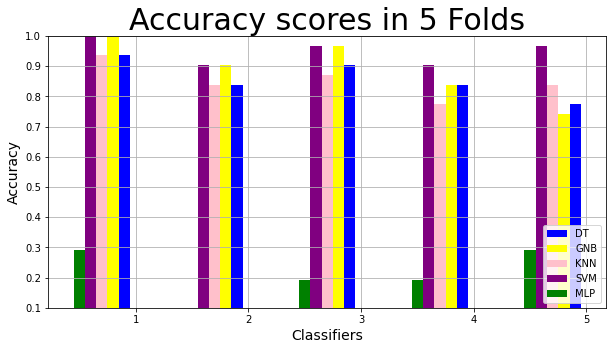

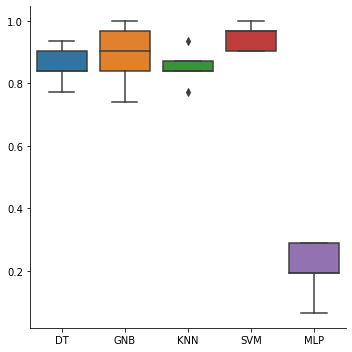

In [15]:
# Breast cancer(Applying Fuzzy gene selection mehtod for selecting small number of genes) 
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data4= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/BreastCancer/Microarray/Microarray/155SamplesBreastCancerSubtypes1.csv")
X = data4.drop('Class', axis=1)#independent columns
y =data4['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
              # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()

print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'linear', C = 1)
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
a=[]
b=[1]

MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
    a.append(mlp[k])
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

Decision Tree Results
accuracy 0.896774193548387
Precision= 0.9093650793650794
Recall= 0.8961111111111111
F1-score= 0.8888159988159987
Gaussian Naive Bayes Results
accuracy 0.9161290322580646
Precision= 0.9455122655122654
Recall= 0.9225
F1-score= 0.9284519321980623
K-Nearest Neighbors Results
accuracy 0.9548387096774194
Precision= 0.9652910052910053
Recall= 0.9627777777777778
F1-score= 0.9628614958026723
Support Vector Machine Results
accuracy 0.9870967741935484
Precision= 0.9915343915343915
Recall= 0.9888888888888889
F1-score= 0.9894145070615659
Multilayer Perceptron Results
accuracy 0.9870967741935484
Precision= 0.9933333333333334
Recall= 0.9888888888888889
F1-score= 0.9896296296296295


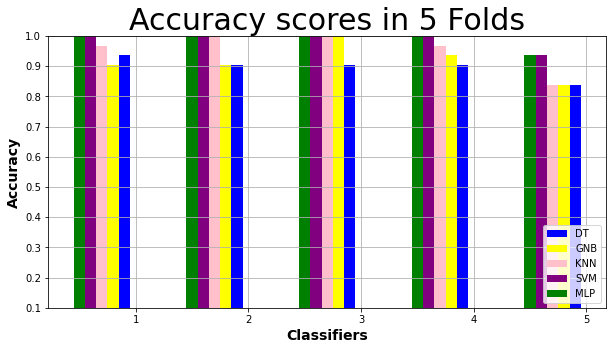

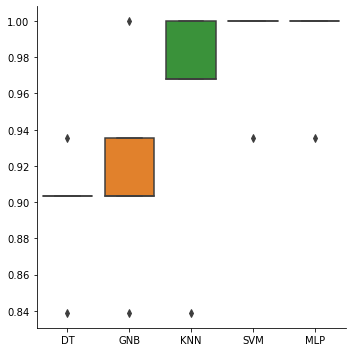

In [3]:
# Breast cancer(Applying Fuzzy gene selection mehtod for selecting small number of genes) 
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data4= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/BreastCancer/Microarray/FuzzyGeneSelected_Breastcancer/FuzzyGenes.csv")
X = data4.drop('Class', axis=1)#independent columns
y =data4['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label,weight='bold', fontsize=14)
        plt.ylabel(y_label,weight='bold', fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'linear', C = 1)
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

Decision Tree Results
accuracy 0.911794201002834
Precision= 0.8724112774238073
Recall= 0.8535173298637856
F1-score= 0.8582966171493279
Gaussian Naive Bayes Results
accuracy 0.9400927105205789
Precision= 0.8971744894186399
Recall= 0.922367317141149
F1-score= 0.9074511978996279
K-Nearest Neighbors Results
accuracy 0.8820637270088234
Precision= 0.8331473018570206
Recall= 0.8158736663644616
F1-score= 0.8191777743166029
Support Vector Machine Results
accuracy 0.9367204800752699
Precision= 0.9118706389114187
Recall= 0.8896430534404173
F1-score= 0.898386543232996
Multilayer Perceptron Results
accuracy 0.9405539683086067
Precision= 0.9085828735974383
Recall= 0.8985098190637514
F1-score= 0.9001656886472679


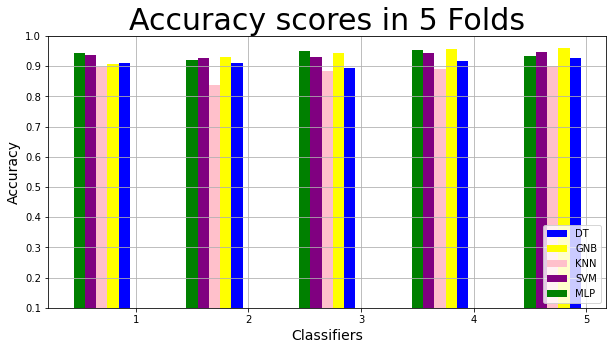

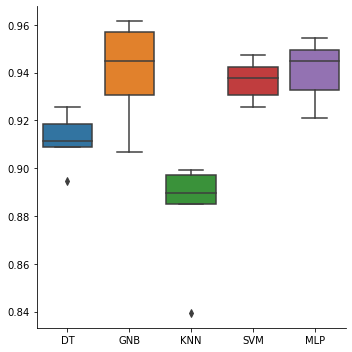

In [12]:
#  Five cancer types (Without applying Fuzzy gene selection)
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data5 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/fiveTypes/FiveCancerTypes.csv")
X = data5.drop('Class', axis=1)#independent columns
y =data5['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'rbf')
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

Decision Tree Results
accuracy 0.9170619485273026
Precision= 0.8804468502100002
Recall= 0.8705982617909791
F1-score= 0.8656680162273892
Gaussian Naive Bayes Results
accuracy 0.9242619301687837
Precision= 0.8778905641808852
Recall= 0.9086962439256832
F1-score= 0.8901106150518043
K-Nearest Neighbors Results
accuracy 0.936247748212913
Precision= 0.8945417718311688
Recall= 0.9012314676816615
F1-score= 0.8960565584507698
Support Vector Machine Results
accuracy 0.9415246749968447
Precision= 0.9055563539895088
Recall= 0.907724790765639
F1-score= 0.9052002502791101
Multilayer Perceptron Results
accuracy 0.9530182552522575
Precision= 0.9247712854251317
Recall= 0.9183114989691695
F1-score= 0.9179872425625796


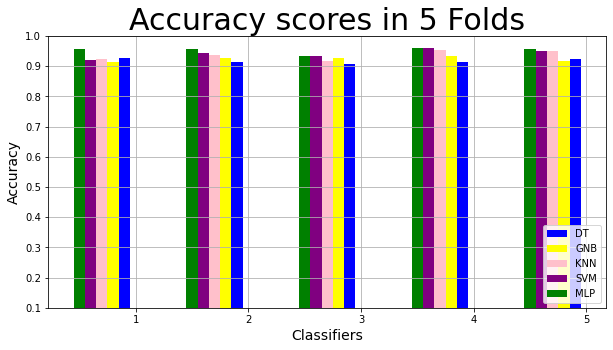

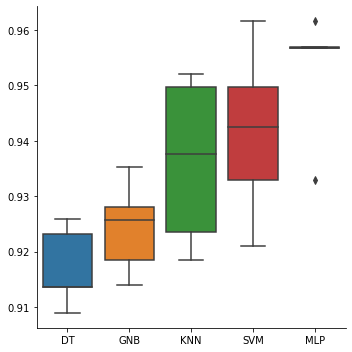

In [13]:
# Five cancer types (applying Fuzzy gene selection)
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data6= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/fiveTypes/FiveTypes_Fuzzy/FuzzyGenes.csv")
X = data6.drop('Class', axis=1)#independent columns
X = (X - X.min())/ (X.max() - X.min())
y =data6['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'linear', C = 1)
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 1000, solver = 'adam',random_state=0)
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

Decision Tree Results
accuracy 0.8761904761904763


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision= 0.7767676767676768
Recall= 0.8103703703703703
F1-score= 0.7900355463822956
Gaussian Naive Bayes Results
accuracy 0.9047619047619048
Precision= 0.937965552965553
Recall= 0.8977777777777778
F1-score= 0.9026084250125169
K-Nearest Neighbors Results
accuracy 0.9142857142857144


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision= 0.8774242424242426
Recall= 0.8659259259259258
F1-score= 0.8632470064049012
Support Vector Machine Results
accuracy 0.9333333333333333
Precision= 0.9538047138047139
Recall= 0.9214814814814816
F1-score= 0.9249122807017545
Multilayer Perceptron Results
accuracy 0.7238095238095238


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Un

Precision= 0.5562433862433862
Recall= 0.645925925925926
F1-score= 0.5857676449187486


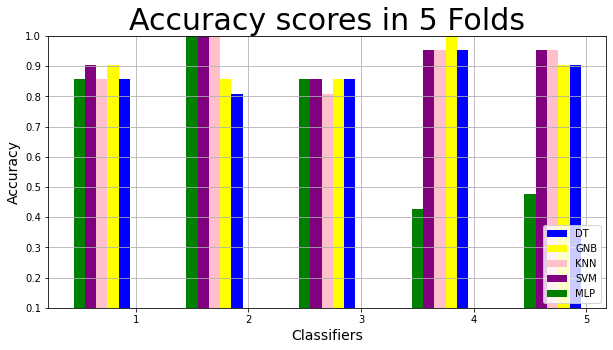

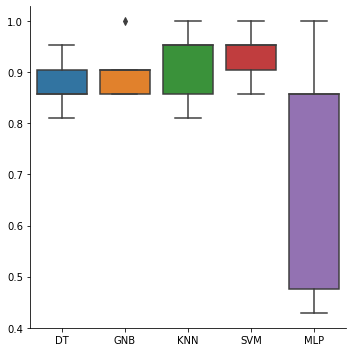

In [14]:
# Thyroid cancer (without applying Fuzzy gene selection)
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data7 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/thyroid/Microarray/Orginalthyroid.csv")
data7 = data7.iloc[: , 1:]
X = data7.drop('Class', axis=1)#independent columns
X = (X - X.min())/ (X.max() - X.min())
y =data7['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'linear', C = 1)
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

Decision Tree Results
accuracy 0.9333333333333333
Precision= 0.9348148148148148
Recall= 0.9355555555555556
F1-score= 0.9250763048441067
Gaussian Naive Bayes Results
accuracy 0.9238095238095237
Precision=

C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.8831986531986532
Recall= 0.8985185185185186
F1-score= 0.8886431765688731
K-Nearest Neighbors Results
accuracy 0.9428571428571428
Precision= 0.9604713804713805
Recall= 0.9281481481481482
F1-score= 0.9319298245614036
Support Vector Machine Results
accuracy 0.9428571428571428
Precision= 0.9604713804713805
Recall= 0.9281481481481482
F1-score= 0.9319298245614036
Multilayer Perceptron Results
accuracy 0.9428571428571428


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision= 0.8892592592592592
Recall= 0.9059259259259258
F1-score= 0.8957003620161516


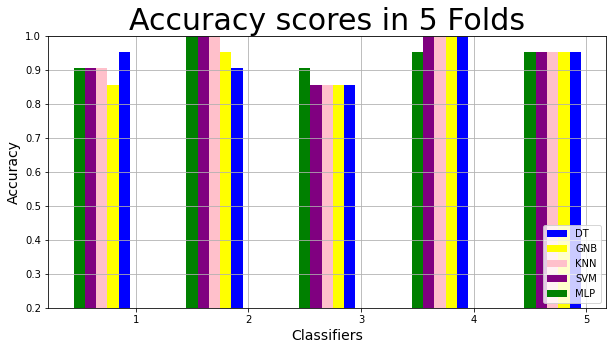

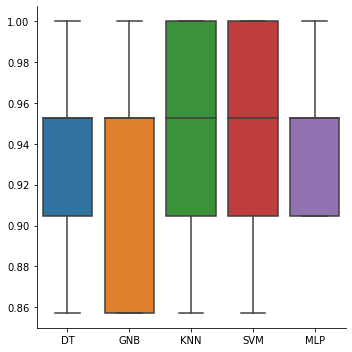

In [16]:
# Thyroid cancer (applying Fuzzy gene selection)
#With employing five classifier approaches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data8 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/thyroid/Microarray/FuzzyGenes.csv")
X = data8.drop('Class', axis=1)#independent columns
X = (X - X.min())/ (X.max() - X.min())
y =data8['Class']
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    sum1=0
    sum2=0
    sum3=0
    a=[]
    b=[]
    c=[]
    _scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    
    a=results['test_precision_macro']
    b=results['test_recall_macro']
    c=results['test_f1_macro']
    for i in range (5):
        sum1=sum1+a[i]
        sum2=sum2+b[i]
        sum3=sum3+c[i]
    print("Precision=",sum1/5)
    print("Recall=",sum2/5)
    print("F1-score=",sum3/5)
    
              
def cross_validation1(model, _X, _y, _cv=5):
    d=[]
    sum4=0
    results1 = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring='accuracy',
                               return_train_score=True)
      
    
    return results1['test_score']
              
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.20000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
print("Decision Tree Results")
dt=[]
sumdt=0
DT = DecisionTreeClassifier(max_depth=4,random_state=0)
dt=cross_validation1(DT,X,encoded_y,5)
for s in range(5):
    sumdt=sumdt+dt[s]
print("accuracy",sumdt/5) 
cross_validation(DT, X, encoded_y, 5)
print("Gaussian Naive Bayes Results")
gnb=[]
sumgnb=0
GNB =GaussianNB()
gnb=cross_validation1(GNB,X,encoded_y,5)
for s1 in range(5):
    sumgnb=sumgnb+gnb[s1]
print("accuracy",sumgnb/5) 
cross_validation(GNB, X, encoded_y, 5)
print("K-Nearest Neighbors Results")
knn=[]
sumknn=0
KNN =  KNeighborsClassifier(n_neighbors = 7)
knn=cross_validation1(KNN,X,encoded_y,5)
for s2 in range(5):
    sumknn=sumknn+knn[s2]
print("accuracy",sumknn/5) 
cross_validation(KNN, X, encoded_y, 5)
print("Support Vector Machine Results")
svm=[]
sumsvm=0
SVM = SVC(kernel = 'linear', C = 1)
svm=cross_validation1(SVM,X,encoded_y,5)
for s3 in range(5):
    sumsvm=sumsvm+svm[s3]
print("accuracy",sumsvm/5)
cross_validation(SVM, X, encoded_y, 5)
print("Multilayer Perceptron Results")
mpl=[]
sum=0
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam')
mlp=cross_validation1(MLP,X,encoded_y,5)
for k in range(5):
    sum=sum+mlp[k]
print("accuracy",sum/5) 
cross_validation(MLP, X, encoded_y, 5)
plot_result("Classifiers",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            dt,gnb,knn,svm,mlp)
data1=(dt)
data2=(gnb)
data3=(knn)
data4=(svm)
data5=(mlp)
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

** Decision Tree Results **
Accuracy= 92.80898876404494
Precision= 0.9378723320042373
Recall= 0.9168076109936575
F1-score= 0.9240737036379253
** Gaussian Naive Bayes Results **
Accuracy= 95.0561797752809
Precision= 0.9562085137085138
Recall= 0.9445031712473574
F1-score= 0.948904788277615
** K-Nearest Neighbors Results* *
Accuracy= 94.15730337078652
Precision= 0.9114556145974513
Recall= 0.9768498942917547
F1-score= 0.9425693981312164
** Support Vector Machine Results **
Accuracy= 97.07865168539327
Precision= 0.9648875967284848
Recall= 0.9768498942917547
F1-score= 0.9703998476371247


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


** Multilayer Perceptron Results **
Accuracy= 86.74157303370785
Precision= 0.7651219512195122
Recall= 0.7676532769556026
F1-score= 0.765782678484193


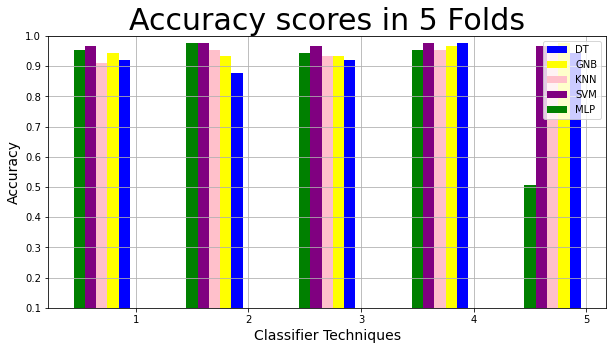

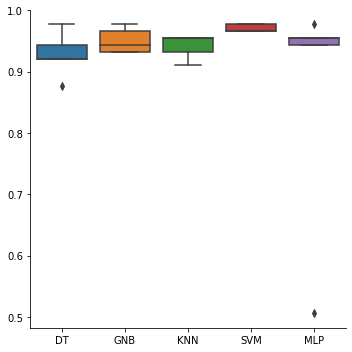

In [17]:
# Liver cancer(GSE14520) without applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data9= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LiverCancer/Microarray/GSE14520-GPL3921_series_matrix.txt/StructuredData.csv") 
data9 = data9.drop('Samples', axis=1)
X = data9.drop('Class', axis=1)#independent columns
y =data9['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"])
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results* *")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)


** Decision Tree Results **
Accuracy= 94.8314606741573
Precision= 0.9539736601361847
Recall= 0.9399577167019029 =
F1-score= 0.9460446247464503
** Gaussian Naive Bayes Results **
Accuracy= 96.62921348314606
Precision= 0.9615888252534216
Recall= 0.9721987315010571
F1-score= 0.9659696736459956
** K-Nearest Neighbors Results **
Accuracy= 96.62921348314606
Precision= 0.9615888252534216
Recall= 0.9721987315010571
F1-score= 0.9659696736459956
** Support Vector Machine Results **
Accuracy= 95.95505617977528
Precision= 0.9561076604554867
Recall= 0.9631078224101481
F1-score= 0.959045594141271
** Multilayer Perceptron Results **
Accuracy= 96.40449438202246
Precision= 0.9650458069062721
Recall= 0.9631078224101479
F1-score= 0.96326072383805


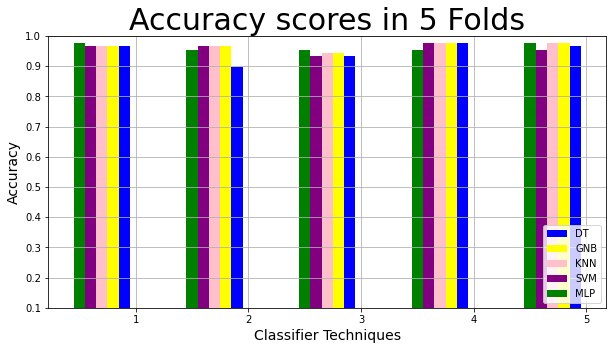

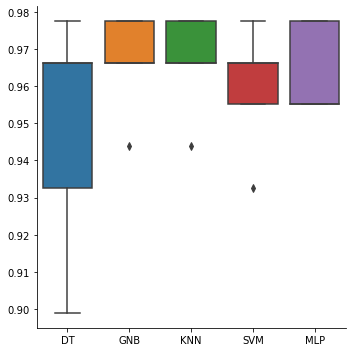

In [18]:
# Liver cancer(GSE14520) and  applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data8= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LiverCancer/Microarray/LiverCancer_GSE14520/FuzzyGenes.csv")
X = data8.drop('Class', axis=1)#independent columns
y =data8['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"],"=")
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results **")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam')
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

** Decision Tree Results **
Accuracy= 96.0
Precision= 0.9436363636363636
Recall= 0.9800000000000001
F1-score= 0.9609523809523809
** Gaussian Naive Bayes Results **
Accuracy= 84.00000000000001
Precision= 1.0
Recall= 0.68
F1-score= 0.8035947712418301
** K-Nearest Neighbors Results* *
Accuracy= 88.99999999999999
Precision= 0.8228438228438228
Recall= 1.0
F1-score= 0.9019386410690758
** Support Vector Machine Results **
Accuracy= 99.0
Precision= 0.9818181818181818
Recall= 1.0
F1-score= 0.9904761904761905
** Multilayer Perceptron Results **
Accuracy= 93.0
Precision= 0.9818181818181818
Recall= 0.8800000000000001
F1-score= 0.919423558897243


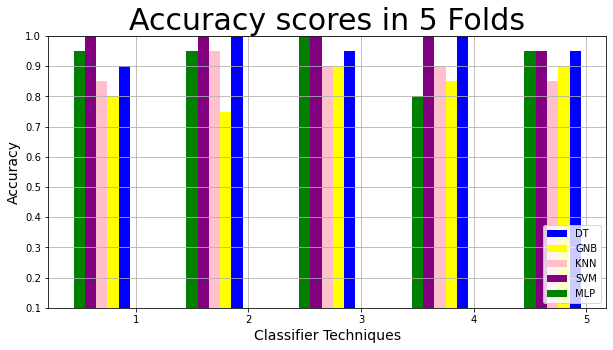

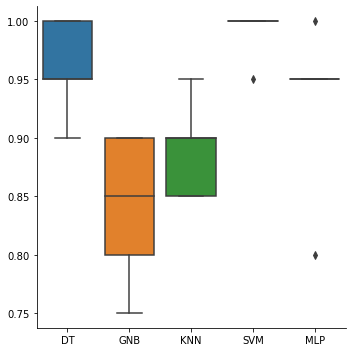

In [19]:
# Liver cancer(GSE77314) without applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data10 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LiverCancer/RNA-seq/Deep Learning/StructureLiverCancer1.csv")
X = data10.drop('Class', axis=1)#independent columns
y =data10['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"])
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results* *")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

** Decision Tree Results **
Accuracy= 98.00000000000001
Precision= 0.9818181818181818
Recall= 0.9800000000000001
F1-score= 0.9799498746867169
** Gaussian Naive Bayes Results **
Accuracy= 97.0
Precision= 0.9818181818181818
Recall= 0.96
F1-score= 0.9682539682539681
** K-Nearest Neighbors Results* *
Accuracy= 99.0
Precision= 0.9818181818181818
Recall= 1.0
F1-score= 0.9904761904761905
** Support Vector Machine Results **
Accuracy= 99.0
Precision= 0.9818181818181818
Recall= 1.0
F1-score= 0.9904761904761905
** Multilayer Perceptron Results **
Accuracy= 99.0
Precision= 0.9818181818181818
Recall= 1.0
F1-score= 0.9904761904761905


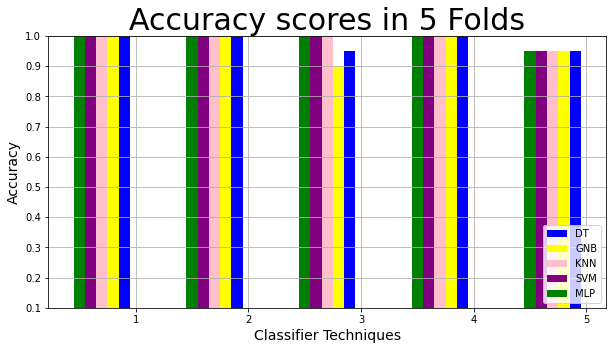

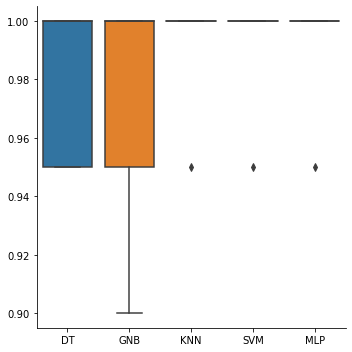

In [20]:
# Liver cancer(GSE77314) and applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data11 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LiverCancer/RNA-seq/LiverCancer_GSE77314/FuzzyGenes.csv")
X = data11.drop('Class', axis=1)#independent columns
X = (X - X.min())/ (X.max() - X.min())
y =data11['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"])
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results* *")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

** Decision Tree Results **
Accuracy= 90.0
Precision= 0.8982517482517484
Recall= 0.9166666666666667
F1-score= 0.9025590062111801
** Gaussian Naive Bayes Results **
Accuracy= 92.5
Precision= 0.9525641025641025
Recall= 0.9
F1-score= 0.9193333333333333
** K-Nearest Neighbors Results* *
Accuracy= 90.83333333333334
Precision= 0.8802197802197803
Recall= 0.95
F1-score= 0.9132307692307691
** Support Vector Machine Results **
Accuracy= 95.83333333333334
Precision= 0.9666666666666666
Recall= 0.95
F1-score= 0.9579710144927537


C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahmood\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Pr

** Multilayer Perceptron Results **
Accuracy= 50.0
Precision= 0.2
Recall= 0.4
F1-score= 0.26666666666666666


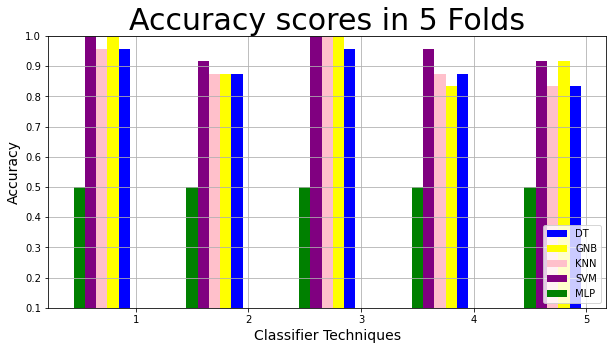

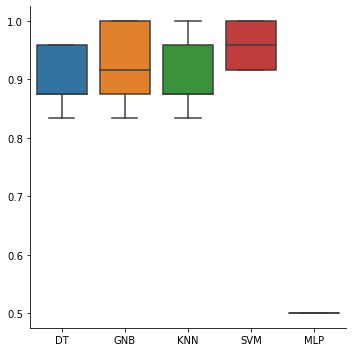

In [21]:
# Lung cancer(GSE19804) without applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data12 = pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LungCancer/Microarray/OrginalData/GSE19804/Preprossing/DataStructured3.csv")
X = data12.drop('Class', axis=1)#independent columns
y =data12['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"])
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results* *")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)

** Decision Tree Results **
Accuracy= 90.83333333333334
Precision= 0.9633333333333333
Recall= 0.85
F1-score= 0.9002164502164502
** Gaussian Naive Bayes Results **
Accuracy= 95.83333333333334
Precision= 0.9679487179487181
Recall= 0.95
F1-score= 0.9571515151515152
** K-Nearest Neighbors Results* *
Accuracy= 96.66666666666669
Precision= 0.9679487179487181
Recall= 0.9666666666666666
F1-score= 0.9666376811594203
** Support Vector Machine Results **
Accuracy= 96.66666666666669
Precision= 0.9679487179487181
Recall= 0.9666666666666666
F1-score= 0.9666376811594203
** Multilayer Perceptron Results **
Accuracy= 97.5
Precision= 0.9692307692307693
Recall= 0.9833333333333332
F1-score= 0.9753043478260869


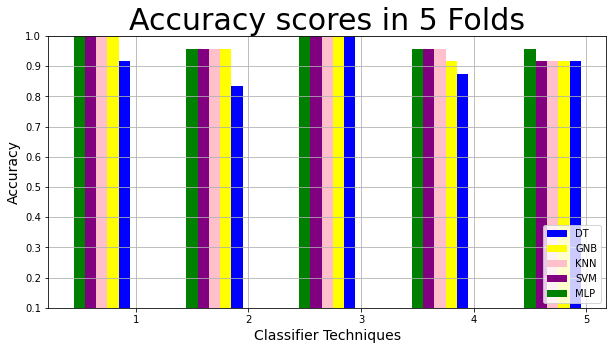

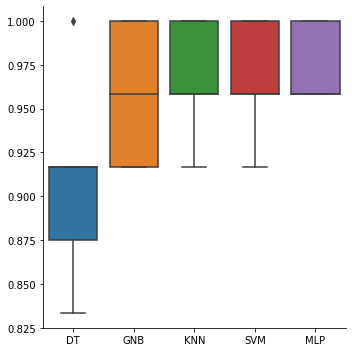

In [22]:
# Lung cancer(GSE19804) and applying fuzzy gene selection method, employing five classifier techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn import model_selection
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data13= pd.read_csv("C:/Users/Mahmood/Desktop/Camparsion/LungCancer/Microarray/DataSetOfLungCancer/GSE19804/SelectedGenes.csv")
X = data13.drop('Class', axis=1)#independent columns
X = (X - X.min())/ (X.max() - X.min())
y =data13['Class']
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Validation Accuracy scores": results['test_accuracy'],
              "Accuracy": results['test_accuracy'].mean()*100,
              "Precision": results['test_precision'].mean(),
              "Recall": results['test_recall'].mean(),
              "F1-Score": results['test_f1'].mean()
              }
    # Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, val_data1,val_data2,val_data3,val_data4,val_data5):
       
        # Set size of plot
        plt.figure(figsize=(10,5))
        labels = ["1", "2", "3", "4","5"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.1, val_data1, 0.1, color='blue', label='DT')
        plt.bar(X_axis-0.2, val_data2, 0.1, color='yellow', label='GNB')
        plt.bar(X_axis-0.3, val_data3, 0.1, color='Pink', label='KNN')
        plt.bar(X_axis-0.4, val_data4, 0.1, color='Purple', label='SVM')
        plt.bar(X_axis-0.5, val_data5, 0.1, color='green', label='MLP')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()
DT = DecisionTreeClassifier(max_depth=4)
DT_result = cross_validation(DT, X, encoded_y, 5)
print("** Decision Tree Results **")
print("Accuracy=",DT_result["Accuracy"])
print("Precision=",DT_result["Precision"])
print("Recall=",DT_result["Recall"])
print("F1-score=",DT_result["F1-Score"])
GNB = GaussianNB()
GNB_result = cross_validation(GNB, X, encoded_y, 5)
print("** Gaussian Naive Bayes Results **")
print("Accuracy=",GNB_result["Accuracy"])
print("Precision=",GNB_result["Precision"])
print("Recall=",GNB_result["Recall"])
print("F1-score=",GNB_result["F1-Score"])
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_result = cross_validation(KNN, X, encoded_y, 5)
print("** K-Nearest Neighbors Results* *")
print("Accuracy=",KNN_result["Accuracy"])
print("Precision=",KNN_result["Precision"])
print("Recall=",KNN_result["Recall"])
print("F1-score=",KNN_result["F1-Score"])
SVM = SVC(kernel = 'linear', C = 1)
SVM_result = cross_validation(SVM, X, encoded_y, 5)
print("** Support Vector Machine Results **")
print("Accuracy=",SVM_result["Accuracy"])
print("Precision=",SVM_result["Precision"])
print("Recall=",SVM_result["Recall"])
print("F1-score=",SVM_result["F1-Score"])
MLP = MLPClassifier(hidden_layer_sizes=(300,200,100), activation='relu', 
                                max_iter = 200, solver = 'adam',random_state=0)
MLP_result = cross_validation(MLP, X, encoded_y, 5)
print("** Multilayer Perceptron Results **")
print("Accuracy=",MLP_result["Accuracy"])
print("Precision=",MLP_result["Precision"])
print("Recall=",MLP_result["Recall"])
print("F1-score=",MLP_result["F1-Score"])
plot_result("Classifier Techniques",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            DT_result["Validation Accuracy scores"],GNB_result["Validation Accuracy scores"], KNN_result["Validation Accuracy scores"],SVM_result["Validation Accuracy scores"],MLP_result["Validation Accuracy scores"])
data1=(DT_result["Validation Accuracy scores"])
data2=(GNB_result["Validation Accuracy scores"])
data3=(KNN_result["Validation Accuracy scores"])
data4=(SVM_result["Validation Accuracy scores"])
data5=(MLP_result["Validation Accuracy scores"])
s=pd.DataFrame(data1,
                columns=['DT'])
s['GNB']=data2
s['KNN']=data3
s['SVM']=data4
s['MLP']=data5
sns.catplot(kind='box',
           data=s)